# 3D Street network plot
***
***
Experimentation to plot a street network in 3d, using the elevation of the intersections.
For the data I used [OSMnx](https://github.com/gboeing/osmnx) developed by Geoff Boeing.
The plot was made with [Plotly](https://plot.ly/)
Any comment/improvements is more than wellcome 
***
[@natera](http://twitter.com/natera)
***

In [1]:
import osmnx as ox
%matplotlib inline

In [2]:
from keys import G_key

## Configure OSMnx

In [3]:
ox.config(data_folder='data', logs_folder='logs', 
          imgs_folder='imgs', cache_folder='cache',
          use_cache=True, log_console=True, 
          log_name='osmnx', log_file=True, log_filename='osmnx')

crs_osm = {'init':'epsg:4326'}     

## Download Guadalajara street network

In [4]:
#Download
G = ox.graph_from_place('Guadalajara, Mexico',which_result=2)

#Project it using osm crm
G = ox.project_graph(G, to_crs=crs_osm)

## Get the elevation data

In [5]:
# add elevation to each of the nodes, using the google elevation API, then calculate edge grades
G = ox.add_node_elevations(G, api_key=G_key, max_locations_per_batch=350)
G = ox.add_edge_grades(G)

In [6]:
# project the street network to UTM
G = ox.project_graph(G)

## Get the colors for the plot based on the elevation

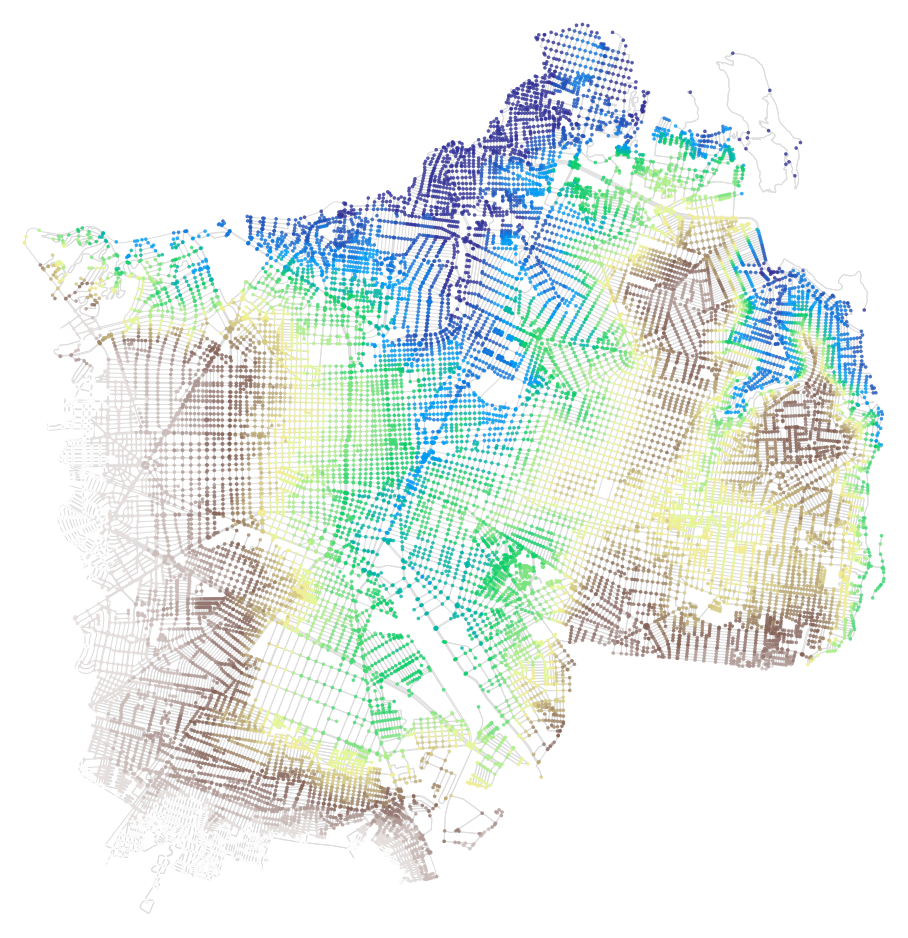

In [7]:
# Get colors
nc = ox.get_node_colors_by_attr(G, 'elevation', cmap='terrain', num_bins=20)

#Plot the network
fig, ax = ox.plot_graph(G, fig_height=17, node_color=nc, node_size=13, node_zorder=2, edge_color='#dddddd', node_alpha=0.8, )

## Make the 3D figure.
We are going to use plotly

In [8]:
import plotly.plotly as py
import plotly.graph_objs as go

## Get the nodes and edges locations

In [9]:
# X, Y, and Z location for the nodes
Xn=[data['lon'] for n, data in G.nodes(data=True)]# x-coordinates of nodes
Yn=[data['lat'] for n, data in G.nodes(data=True)]# y-coordinates
Zn=[data['elevation'] for n, data in G.nodes(data=True)]# z-coordinates


In [10]:
# X, Y, and Z loactions for the edges
Xe=[]
Ye=[]
Ze=[]
for i, j in G.edges():
    Xe+=[G.nodes[i]['lon'],G.nodes[j]['lon'], None]
    Ye+=[G.nodes[i]['lat'],G.nodes[j]['lat'], None]
    Ze+=[G.nodes[i]['elevation'],G.nodes[j]['elevation'], None]

## Prepare the plot

In [11]:
#Get the trace of the edges
trace1=go.Scatter3d(x=Xe, y=Ye, z=Ze, mode='lines',
                    line=dict(color='lightgray', width=1), 
                    hoverinfo='none')

#Trace for the nodes
trace2=go.Scatter3d(x=Xn, y=Yn, z=Zn, mode='markers',
                    name='intersections',
                    marker=dict(symbol='circle', size=3, color=nc, line=dict(color='rgb(50,50,50)', width=0.5)))

#Configure the Axis
axis=dict(showbackground=False, showline=False, zeroline=True, 
          showgrid=False, showticklabels=False, title='')

#Create the layout and scene
layout = go.Layout(title="Guadalajara",width=1000, height=800, showlegend=False,
                   plot_bgcolor='black', scene=dict(xaxis=dict(axis), yaxis=dict(axis),zaxis=dict(axis)), 
                   margin=dict(t=100), hovermode='closest',
                   annotations=[dict(showarrow=False, text="", xref='paper', yref='paper',x=0,y=0.1, 
                                     xanchor='left',yanchor='bottom', font=dict(size=14))])


In [13]:
data=[trace1, trace2]

#Create the figure
fig=go.Figure(data=data, layout=layout)

#Show the plot
py.iplot(fig, filename='Guadalajara', sharing='public')


The draw time for this plot will be slow for all clients.
